In [1]:
from unittest import skipIf

import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import altair as alt

In [2]:
df_path =r'../DATASETS/Social_Network_Ads.csv'

In [3]:
df = pl.read_csv(df_path)

In [52]:
fig = px.scatter(
    data_frame=df,
    x='Age',
    y='EstimatedSalary',
    color='Purchased',
    title='Age vs EstimatedSalary',
)

fig.show()

In [15]:
X = df.select(cs.exclude(['Purchased']))
y = df.get_column('Purchased')

In [17]:
print(type(y))
print(type(X))

<class 'polars.series.series.Series'>
<class 'polars.dataframe.frame.DataFrame'>


In [5]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logistic_regression = LogisticRegression(n_jobs=-1)

In [62]:
logistic_regression.fit(scaled_X_train, y_train)

LogisticRegression(n_jobs=-1)

In [63]:
predictions = logistic_regression.predict(scaled_X_test)

In [64]:
logistic_regression.score(scaled_X_test, y_test)

0.86

In [65]:
logistic_regression.predict([[30, 87000]])

array([1])

In [82]:
logistic_regression.predict([[500000, 200]])

array([1])

In [81]:
pl.DataFrame({
    'Actual Purchased': y_test,
    'Predictions': predictions,
    'Correct': pl.Series(predictions) == y_test,
})

Actual Purchased,Predictions,Correct
i64,i64,bool
0,0,true
1,1,true
0,0,true
1,1,true
0,0,true
…,…,…
0,0,true
1,1,true
0,0,true


In [33]:
type(pl.Series(predictions))

polars.series.series.Series

In [35]:
type(y_test)

polars.series.series.Series

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [83]:
accuracy_score(y_test, predictions)

0.86

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



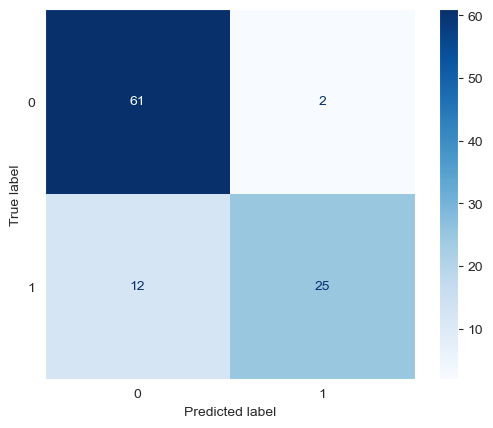

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

In [54]:
fig = px.scatter(
    data_frame=df,
    x='Age',
    y='EstimatedSalary',
    color='Purchased',
    title='Age vs EstimatedSalary',
)

predictions_sales = logistic_regression.predict(scaled_X_test)

fig.add_scatter(
    x=scaled_X_test[:, 0],
    y=scaled_X_test[:, 1],
    mode='markers',
    marker=dict(
        size=16,
        color=predictions_sales,
        colorscale='Blues',
        showscale=True,
    ),
)

fig.show()

In [60]:
conf_matrix = confusion_matrix(y_test, predictions)

fig = px.imshow(
    conf_matrix,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix',
    labels={'x': 'Predicted', 'y': 'Actual'},
    x=['Not Purchased', 'Purchased'],
    y=['Not Purchased', 'Purchased'],
)

fig.update_layout(
    xaxis_title='Predicted Label',
    yaxis_title='Actual Label',
)

fig.show()


In [61]:
fig = px.parallel_categories(
    df,
    dimensions=['Age', 'EstimatedSalary', 'Purchased'],
    color='Purchased',
    title='Feature Relationship with Purchase Decision',
)
fig.show()


In [59]:
# Histogram
fig = px.histogram(
    df.to_pandas(),
    x='Age',
    color='Purchased',
    title='Distribution of Age by Purchase Decision',
    barmode='overlay',
    nbins=20,  # Set number of bins
)
fig.show()

# Box Plot
fig = px.box(
    df.to_pandas(),
    x='Purchased',
    y='EstimatedSalary',
    color='Purchased',
    title='Estimated Salary Distribution by Purchase Decision',
)
fig.show()
